In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from keras.models import Sequential
from keras.layers import LSTM , Dense 
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import TimeseriesGenerator 

In [7]:
df =  pd.read_csv(r'R:\Machine learning\Tensorflow-2\1. Course Overview, Installs, and Setup\TF_2_Notebooks_and_Data\DATA\RSCCASN.csv' , parse_dates= True , index_col= 'DATE')

In [8]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [15]:
lenght = 12
from sklearn.preprocessing import MinMaxScaler
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)
n_features = 1

In [239]:
model = Sequential()
model.add(LSTM(60, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
test = df.iloc[-18:]
scaled_test = sc.transform(test)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)
# fit model
model.fit_generator(generator,epochs=10
                    , validation_data = validation_generator)

Epoch 1/10
322/322 [==============================] - 1s 4ms/step - loss: 0.0271 - val_loss: 0.0132
Epoch 2/10
322/322 [==============================] - 1s 3ms/step - loss: 0.0205 - val_loss: 0.0027
Epoch 3/10
322/322 [==============================] - 1s 3ms/step - loss: 0.0175 - val_loss: 0.0094
Epoch 4/10
322/322 [==============================] - 1s 3ms/step - loss: 0.0121 - val_loss: 0.0062
Epoch 5/10
322/322 [==============================] - 1s 3ms/step - loss: 0.0050 - val_loss: 0.0039
Epoch 6/10
322/322 [==============================] - 1s 3ms/step - loss: 0.0030 - val_loss: 8.7235e-04
Epoch 7/10
322/322 [==============================] - 1s 3ms/step - loss: 0.0018 - val_loss: 5.7821e-04
Epoch 8/10
322/322 [==============================] - 1s 4ms/step - loss: 0.0015 - val_loss: 9.8552e-04
Epoch 9/10
322/322 [==============================] - 1s 4ms/step - loss: 0.0012 - val_loss: 7.6422e-04
Epoch 10/10
322/322 [==============================] - 1s 4ms/step - loss: 0.0011 - 

<AxesSubplot:>

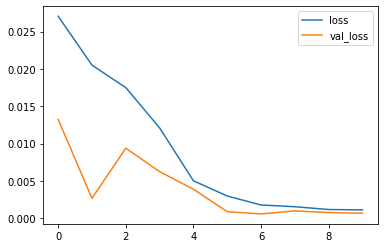

In [240]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [241]:
period = 72

f = df.iloc[-12:]
f = sc.transform(f)
f = f.reshape(1,12,1)
next_pred = []
for i in range(0,period):
    pred = model.predict(f)[0]
    next_pred.append(pred)
    f  = np.append(f[: , 1:, :] , [[pred]]  , axis = 1)

In [242]:
pred = sc.inverse_transform(next_pred)

In [243]:
forecast_index = pd.date_range(start='2019-11-01',periods=period,freq='MS')

In [244]:
forecast_df = pd.DataFrame(data=pred,index=forecast_index,
                           columns=['Forecast'])

In [245]:
forecast_df.head()

,Forecast
2019-11-01,26866.638574
2019-12-01,36319.783815
2020-01-01,16570.809022
2020-02-01,18395.712654
2020-03-01,22203.578001


<AxesSubplot:xlabel='DATE'>

<Figure size 1440x864 with 0 Axes>

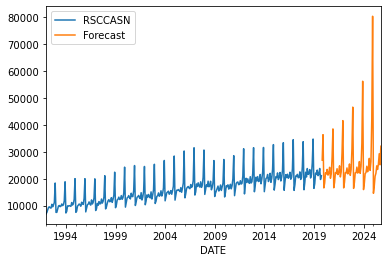

In [246]:
plt.figure(figsize=(20,12))
ax = df.plot()
forecast_df.plot(ax=ax)

<AxesSubplot:>

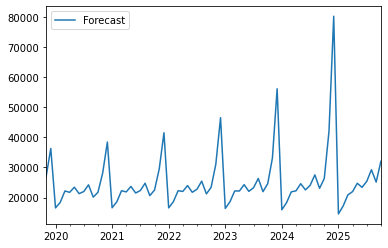

In [247]:
forecast_df.plot()

(528.0, 635.0)

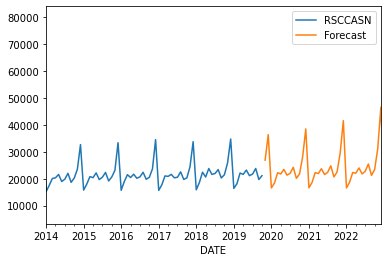

In [248]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2014-01-01','2022-12-01')

In [249]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
test = df.iloc[-18:]
scaled_test = sc.transform(test)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)
# fit model
model.fit_generator(generator,epochs=10
                    , validation_data = validation_generator)

Epoch 1/10
322/322 [==============================] - 1s 3ms/step - loss: 0.0261 - val_loss: 0.0028
Epoch 2/10
322/322 [==============================] - 1s 3ms/step - loss: 0.0170 - val_loss: 0.0039
Epoch 3/10
322/322 [==============================] - 1s 3ms/step - loss: 0.0107 - val_loss: 0.0042
Epoch 4/10
322/322 [==============================] - 1s 3ms/step - loss: 0.0035 - val_loss: 0.0052
Epoch 5/10
322/322 [==============================] - 1s 3ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 6/10
322/322 [==============================] - 1s 3ms/step - loss: 0.0018 - val_loss: 0.0057
Epoch 7/10
322/322 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/10
322/322 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 2.1537e-04
Epoch 9/10
322/322 [==============================] - 1s 3ms/step - loss: 0.0018 - val_loss: 4.6192e-04
Epoch 10/10
322/322 [==============================] - 1s 4ms/step - loss: 0.0015 - val_loss

<AxesSubplot:>

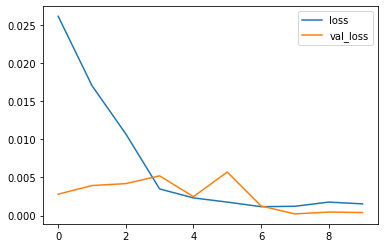

In [250]:
losses = pd.DataFrame(model.history.history)
losses.plot()

<AxesSubplot:xlabel='DATE'>

<Figure size 1440x864 with 0 Axes>

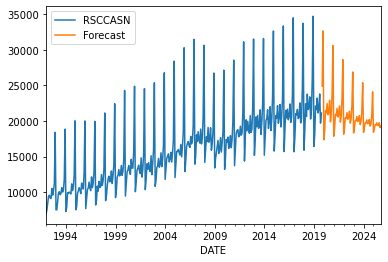

In [251]:
period = 72

f = df.iloc[-12:]
f = sc.transform(f)
f = f.reshape(1,12,1)
next_pred = []
for i in range(0,period):
    pred = model.predict(f)[0]
    next_pred.append(pred)
    f  = np.append(f[: , 1:, :] , [[pred]]  , axis = 1)

pred = sc.inverse_transform(next_pred)
forecast_index = pd.date_range(start='2019-11-01',periods=period,freq='MS')
forecast_df = pd.DataFrame(data=pred,index=forecast_index,
                           columns=['Forecast'])
plt.figure(figsize=(20,12))
ax = df.plot()
forecast_df.plot(ax=ax)

In [252]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
test = df.iloc[-18:]
scaled_test = sc.transform(test)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)
# fit model
model.fit_generator(generator,epochs=10
                    , validation_data = validation_generator)

Epoch 1/10
322/322 [==============================] - 2s 5ms/step - loss: 0.0206 - val_loss: 0.0173
Epoch 2/10
322/322 [==============================] - 1s 4ms/step - loss: 0.0107 - val_loss: 0.0043
Epoch 3/10
322/322 [==============================] - 1s 4ms/step - loss: 0.0050 - val_loss: 5.2951e-04
Epoch 4/10
322/322 [==============================] - 1s 4ms/step - loss: 0.0022 - val_loss: 6.1084e-04
Epoch 5/10
322/322 [==============================] - 2s 5ms/step - loss: 0.0017 - val_loss: 8.0897e-04
Epoch 6/10
322/322 [==============================] - 2s 5ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 7/10
322/322 [==============================] - 2s 5ms/step - loss: 0.0021 - val_loss: 3.0934e-04
Epoch 8/10
322/322 [==============================] - 2s 5ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 9/10
322/322 [==============================] - 2s 5ms/step - loss: 0.0019 - val_loss: 7.4409e-04
Epoch 10/10
322/322 [==============================] - 2s 5ms/step - loss: 0.001

<AxesSubplot:>

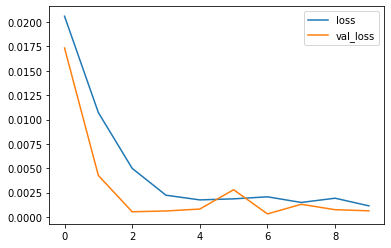

In [253]:
losses = pd.DataFrame(model.history.history)
losses.plot()


<AxesSubplot:xlabel='DATE'>

<Figure size 1440x864 with 0 Axes>

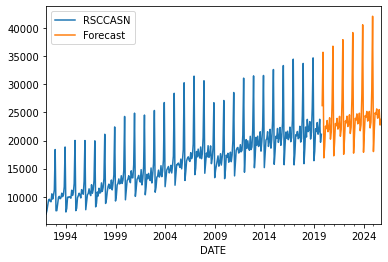

In [254]:
period = 72

f = df.iloc[-12:]
f = sc.transform(f)
f = f.reshape(1,12,1)
next_pred = []
for i in range(0,period):
    pred = model.predict(f)[0]
    next_pred.append(pred)
    f  = np.append(f[: , 1:, :] , [[pred]]  , axis = 1)

pred = sc.inverse_transform(next_pred)
forecast_index = pd.date_range(start='2019-11-01',periods=period,freq='MS')
forecast_df = pd.DataFrame(data=pred,index=forecast_index,
                           columns=['Forecast'])
plt.figure(figsize=(20,12))
ax = df.plot()
forecast_df.plot(ax=ax)